In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

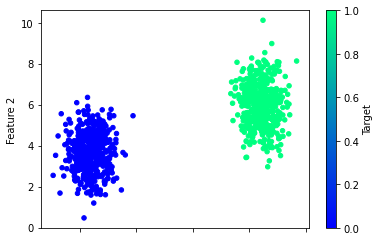

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8717 - accuracy: 0.1173
Epoch 2/100
24/24 [==============================] - 0s 998us/step - loss: 0.8466 - accuracy: 0.1547
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8242 - accuracy: 0.1827
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8053 - accuracy: 0.2253
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7887 - accuracy: 0.2587
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7751 - accuracy: 0.2840
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7631 - accuracy: 0.3173
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7527 - accuracy: 0.3493
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7436 - accuracy: 0.3667
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7358 - accuracy: 0.3840
Epoch 1

24/24 [==============================] - 0s 954us/step - loss: 0.2221 - accuracy: 0.9573
Epoch 83/100
24/24 [==============================] - 0s 911us/step - loss: 0.2169 - accuracy: 0.9600
Epoch 84/100
24/24 [==============================] - 0s 911us/step - loss: 0.2119 - accuracy: 0.9600
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2070 - accuracy: 0.9640
Epoch 86/100
24/24 [==============================] - 0s 997us/step - loss: 0.2022 - accuracy: 0.9680
Epoch 87/100
24/24 [==============================] - 0s 954us/step - loss: 0.1976 - accuracy: 0.9693
Epoch 88/100
24/24 [==============================] - 0s 867us/step - loss: 0.1931 - accuracy: 0.9720
Epoch 89/100
24/24 [==============================] - 0s 867us/step - loss: 0.1888 - accuracy: 0.9733
Epoch 90/100
24/24 [==============================] - 0s 911us/step - loss: 0.1846 - accuracy: 0.9733
Epoch 91/100
24/24 [==============================] - 0s 933us/step - loss: 0.1805 - accuracy: 0.

<AxesSubplot:>

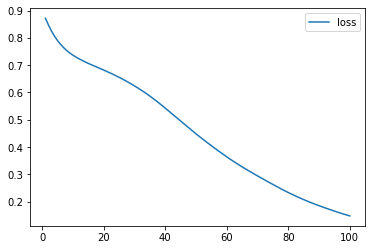

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

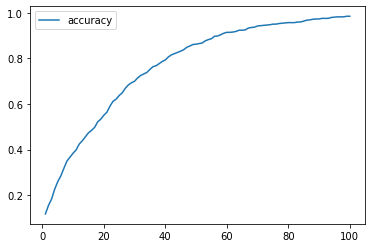

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.1342 - accuracy: 0.9960 - 134ms/epoch - 17ms/step
Loss: 0.1341625154018402, Accuracy: 0.9959999918937683


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 76ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

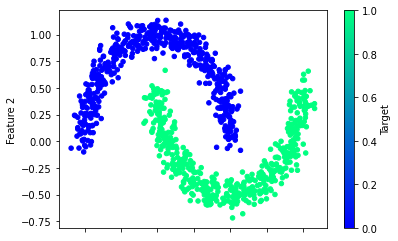

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.5635 - accuracy: 0.3013
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.3538 - accuracy: 0.3133
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 1.2101 - accuracy: 0.3400
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1143 - accuracy: 0.3613
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0435 - accuracy: 0.3787
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9892 - accuracy: 0.3947
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9458 - accuracy: 0.4133
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9101 - accuracy: 0.4280
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8789 - accuracy: 0.4520
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8516 - accuracy: 0.4680
Epoch 11/

24/24 [==============================] - 0s 781us/step - loss: 0.4306 - accuracy: 0.7973
Epoch 83/100
24/24 [==============================] - 0s 910us/step - loss: 0.4283 - accuracy: 0.8000
Epoch 84/100
24/24 [==============================] - 0s 824us/step - loss: 0.4260 - accuracy: 0.8027
Epoch 85/100
24/24 [==============================] - 0s 781us/step - loss: 0.4236 - accuracy: 0.8027
Epoch 86/100
24/24 [==============================] - 0s 911us/step - loss: 0.4212 - accuracy: 0.8027
Epoch 87/100
24/24 [==============================] - 0s 824us/step - loss: 0.4188 - accuracy: 0.8053
Epoch 88/100
24/24 [==============================] - 0s 824us/step - loss: 0.4163 - accuracy: 0.8053
Epoch 89/100
24/24 [==============================] - 0s 821us/step - loss: 0.4139 - accuracy: 0.8080
Epoch 90/100
24/24 [==============================] - 0s 824us/step - loss: 0.4114 - accuracy: 0.8080
Epoch 91/100
24/24 [==============================] - 0s 824us/step - loss: 0.4091 - accuracy: 

<AxesSubplot:>

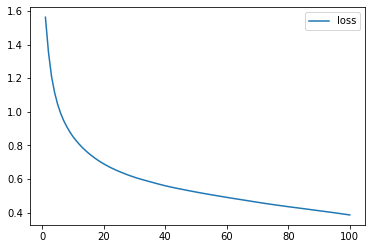

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

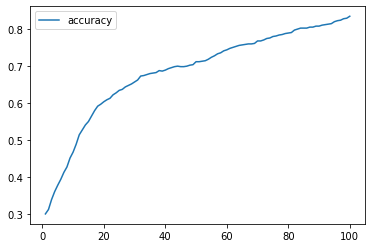

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [23]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [24]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0234 - accuracy: 0.1840
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9409 - accuracy: 0.3413
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8672 - accuracy: 0.4227
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8039 - accuracy: 0.4440
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7487 - accuracy: 0.4720
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7004 - accuracy: 0.5240
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6559 - accuracy: 0.7213
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6157 - accuracy: 0.8160
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5775 - accuracy: 0.8307
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5418 - accuracy: 0.8480
Epoch 11/

24/24 [==============================] - 0s 954us/step - loss: 0.2456 - accuracy: 0.8960
Epoch 83/100
24/24 [==============================] - 0s 954us/step - loss: 0.2454 - accuracy: 0.8960
Epoch 84/100
24/24 [==============================] - 0s 997us/step - loss: 0.2452 - accuracy: 0.8960
Epoch 85/100
24/24 [==============================] - 0s 867us/step - loss: 0.2449 - accuracy: 0.8947
Epoch 86/100
24/24 [==============================] - 0s 954us/step - loss: 0.2448 - accuracy: 0.8947
Epoch 87/100
24/24 [==============================] - 0s 911us/step - loss: 0.2446 - accuracy: 0.8947
Epoch 88/100
24/24 [==============================] - 0s 954us/step - loss: 0.2443 - accuracy: 0.8947
Epoch 89/100
24/24 [==============================] - 0s 867us/step - loss: 0.2442 - accuracy: 0.8947
Epoch 90/100
24/24 [==============================] - 0s 954us/step - loss: 0.2440 - accuracy: 0.8947
Epoch 91/100
24/24 [==============================] - 0s 911us/step - loss: 0.2438 - accuracy: 